In [91]:
install.packages("TSA")
library(TSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [92]:
  data <- read.csv('var_11_Task_5.rds',header = T)
  head(data)

,Series1,Series2,Series3
,<dbl>,<dbl>,<dbl>
1,2.1809609,0.0000000,-0.1056066
2,-8.2263179,5.1393582,0.3646122
3,-6.1098091,8.6057257,1.0219946
4,-0.8807765,2.1951400,0.6130396
5,5.4180759,-0.1384464,1.8243909
6,8.2854229,3.7631450,0.6393972


Series1

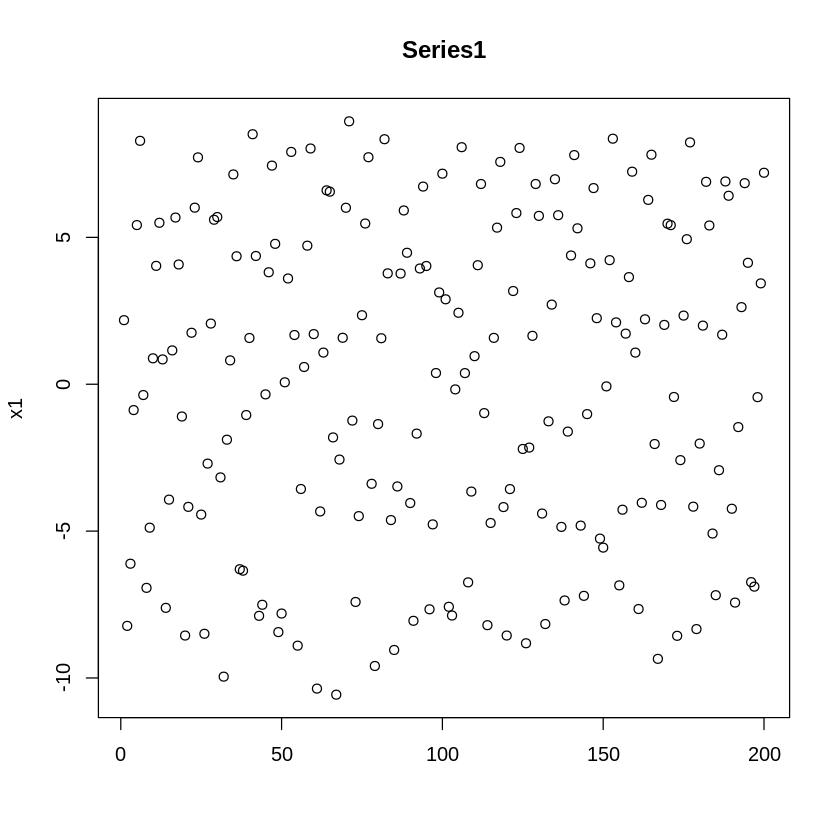

In [93]:
x1 <- data[,1]
matplot(x1,type='p',main='Series1',pch=21)

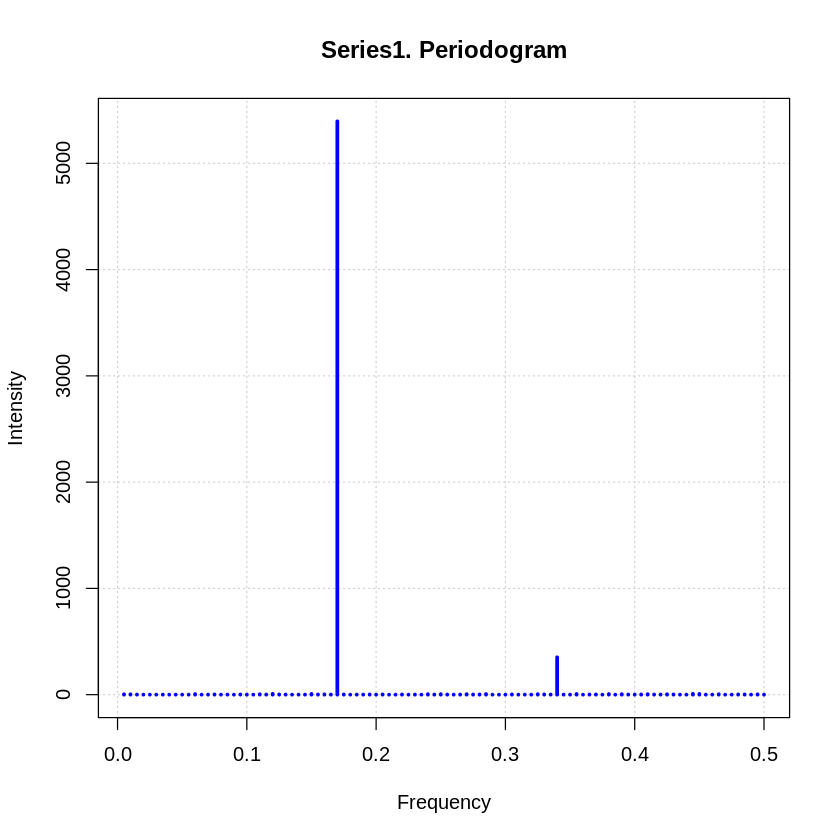

In [94]:
pgm<- periodogram(x1, col = "blue",lwd = 3,main = 'Series1. Periodogram',xlab='Frequency',ylab='Intensity',panel.first=grid(nx=NULL,ny = NULL))

Series2

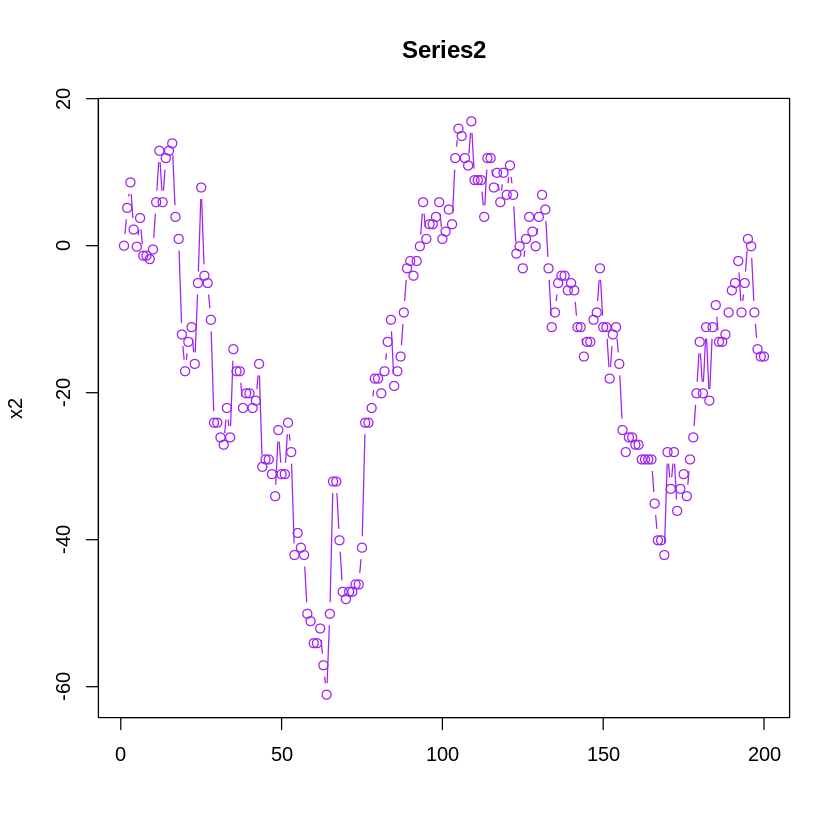

In [95]:
x2 <- data[,2]
matplot(x2,type='b',main='Series2',pch=21,col='purple')

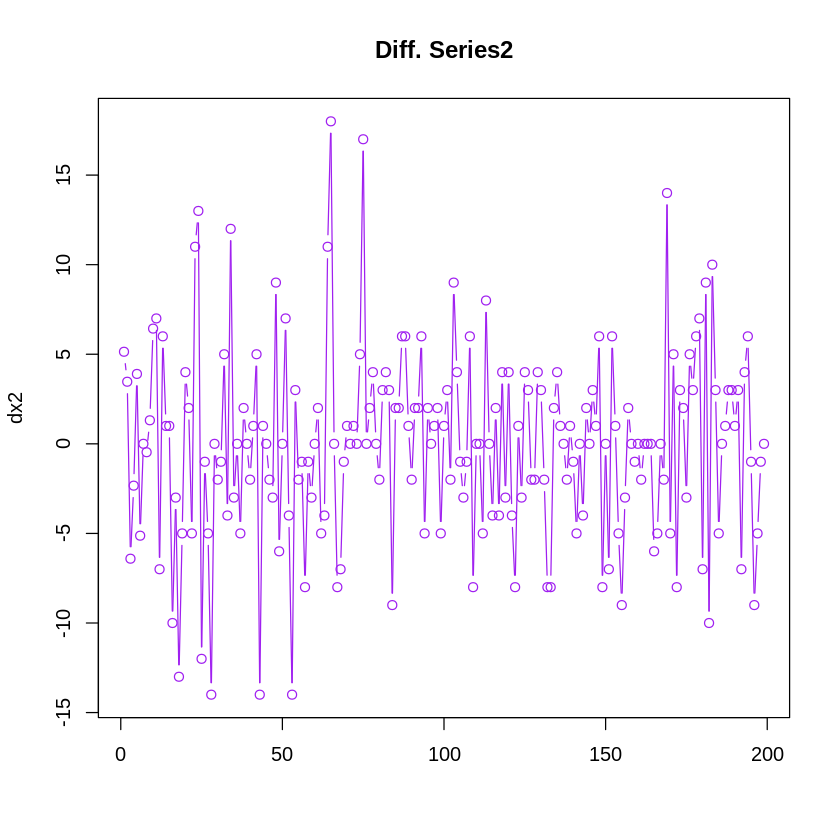

In [96]:
dx2 <-diff(x2)
matplot(dx2,type='b',main='Diff. Series2',pch=21,col='purple')

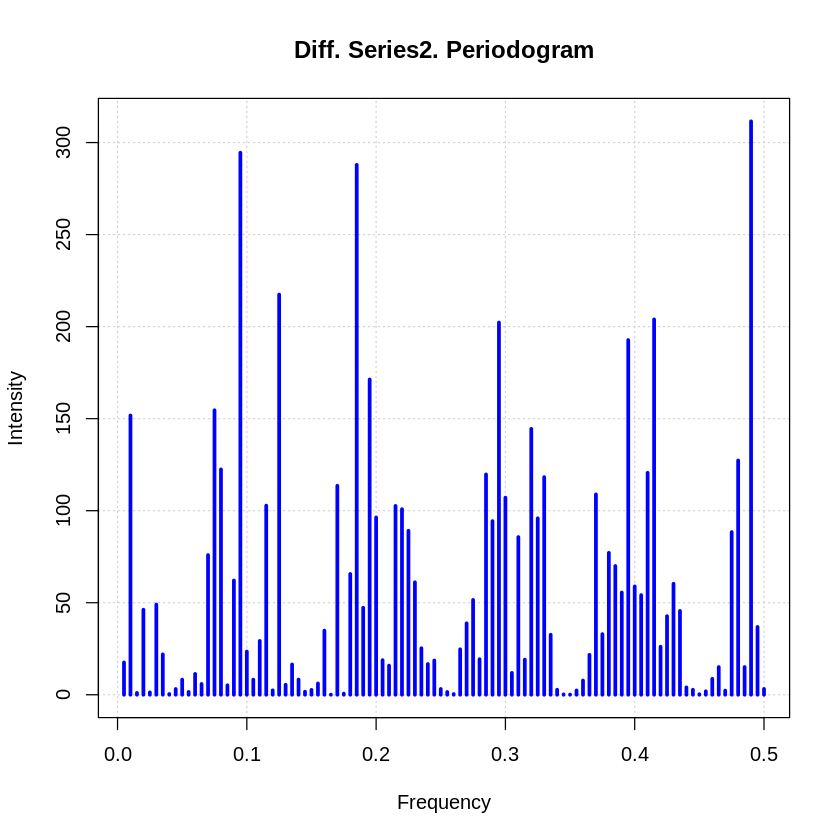

In [97]:
pgm<- periodogram(dx2, col = "blue",lwd = 3,main = 'Diff. Series2. Periodogram',xlab='Frequency',ylab='Intensity',panel.first=grid(nx=NULL,ny = NULL))

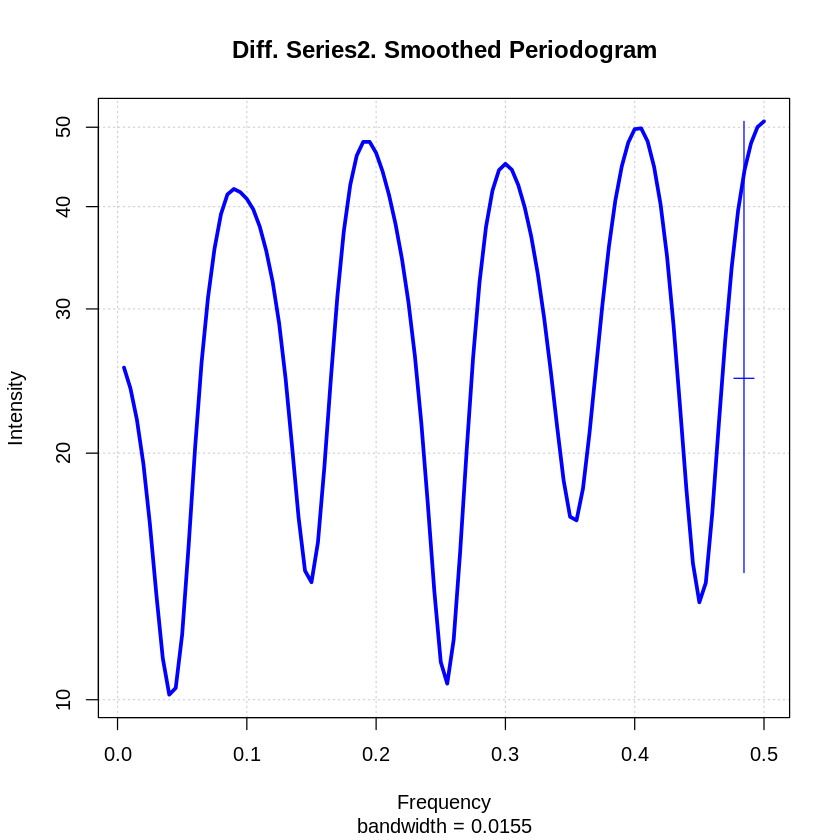

In [98]:
specc <-spec.pgram(dx2,c(7,7,7),col = "blue",lwd = 3,main = 'Diff. Series2. Smoothed Periodogram',xlab='Frequency',ylab='Intensity',panel.first=grid(nx=NULL,ny = NULL))

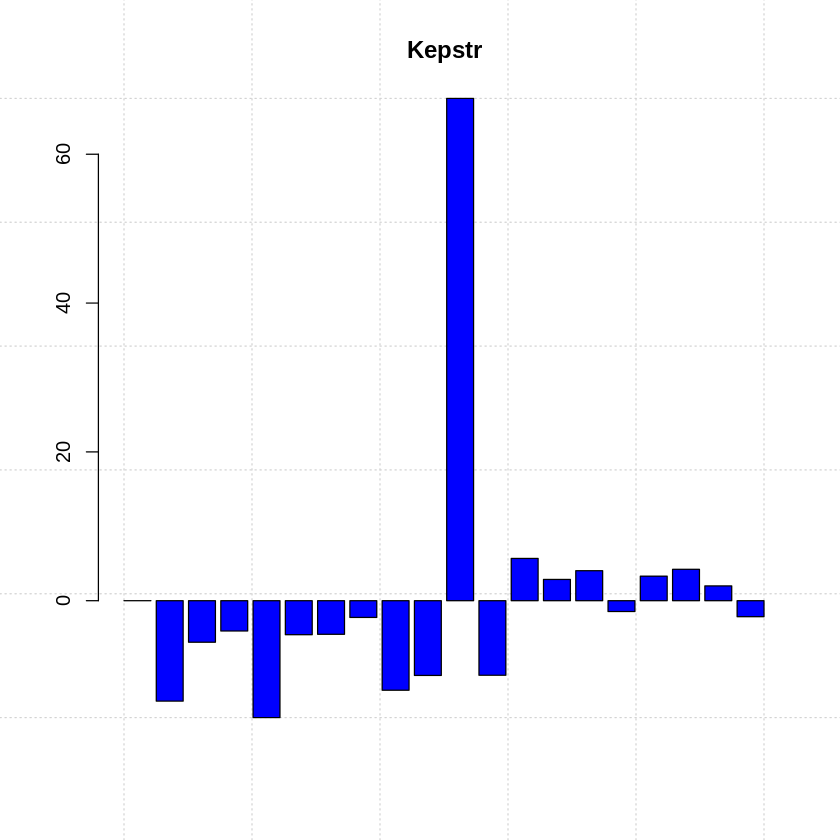

In [99]:
l <- Re(fft(log(abs(fft(dx2))), inverse = TRUE))
l[1]=0
barplot(l[1:20],col = "blue",main="Kepstr",panel.first=grid(nx=NULL,ny = NULL))

In [100]:
(kep_val <-l[11])

[1] 67.50414

Series3

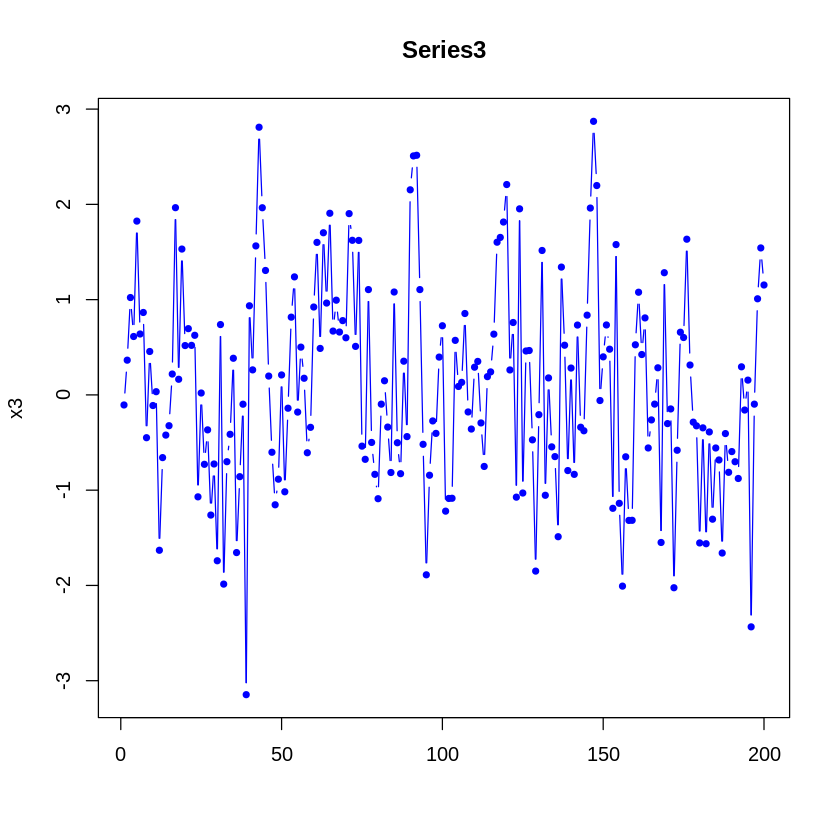

In [101]:
x3 <- data[,3]
matplot(x3,type='b',main='Series3',pch=20,col='blue')

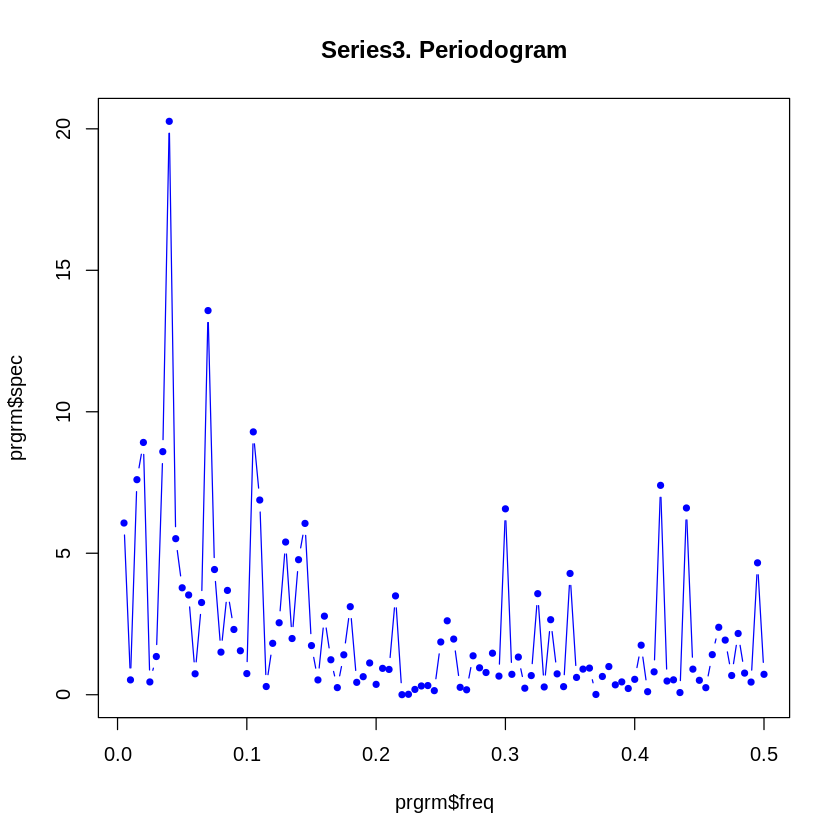

In [102]:
prgrm<- periodogram(x3, col = "blue",lwd = 3,plot = FALSE)
plot(prgrm$freq,prgrm$spec,main = "Series3. Periodogram", type = 'b',pch = 20, col='blue')


In [103]:
(sd_prgrm<- sd(prgrm$spec))

[1] 3.101467

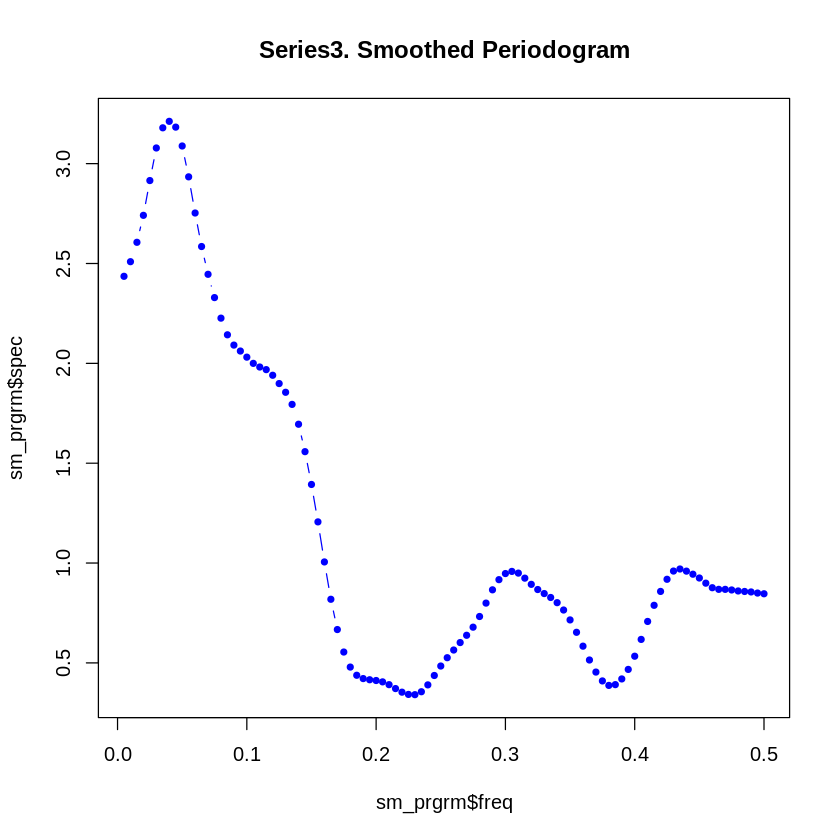

In [104]:
sm_prgrm <-spec.pgram(x3,c(7,7,7),plot=FALSE)
plot(sm_prgrm$freq,sm_prgrm$spec,type = 'b',pch = 20,main = "Series3. Smoothed Periodogram",col='blue')

In [105]:
(sd_sm_prgrm<- sd(sm_prgrm$spec))

[1] 0.8389674

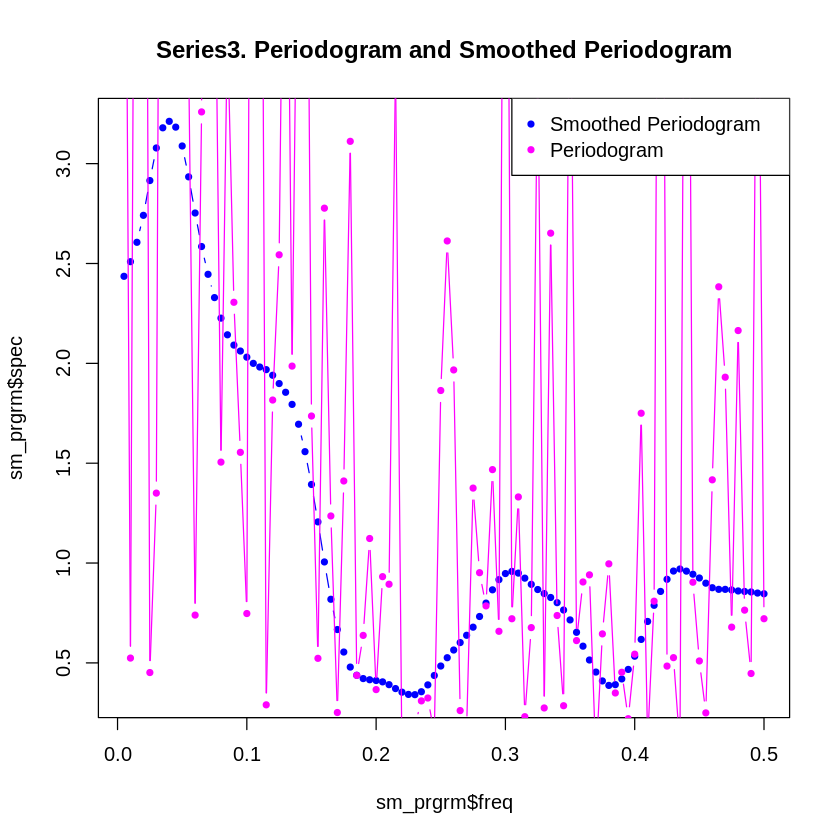

In [106]:
plot(sm_prgrm$freq,sm_prgrm$spec,type = 'b',pch = 20,main = "Series3. Periodogram and Smoothed Periodogram",col='blue')
lines(prgrm$freq,prgrm$spec, type = 'b',pch = 20, col='Magenta')
legend("topright",legend= c("Smoothed Periodogram","Periodogram"),col = c("blue","magenta"),pch = 20)

Удаление эха из w, используя keps (хотя его следует считать внутри используя ceps), задержка, амплитуда.

In [2]:
install.packages(c("seewave", "tuneR"))
library(seewave)
library(tuneR)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
deleteecho<-function(w,kep,f,delay,Magnit)
{

  kepnum <- as.vector(kep[,2],mode = "numeric")
  n <- length(kepnum)
  delayIndex <-as.integer(delay/(1 / f))
  delayIndex <- min(delayIndex,n)+1
  Coeff <- -Magnit;
  Shift <- delayIndex;
  resl = w@left
  m <- length(resl)
  ret <- w
  while(Shift <= m)
  {
    for(i in (Shift+1):m)
    {
      dl = w@left[i-Shift]
      resl[i] <- as.integer(resl[i]+ Coeff*dl)
    }
    Shift <- Shift + delayIndex;
    Coeff <- -Coeff*Magnit;
  }
  ret@left <- resl
  if (w@stereo== TRUE)
  {
    Coeff <- -Magnit;
    Shift <- delayIndex;
    resr = w@right
    m <- length(resr)
    while(Shift <= m)
    {
      for(i in (Shift+1):m)
      {

        dr = w@right[i-Shift]
        resr[i] <- as.integer(resr[i]+ Coeff*dr)
      }
      Shift <- Shift + delayIndex;
      Coeff <- -Coeff*Magnit;
    }
    ret@right <- resr
  }

  return(ret)
}

In [ ]:

lecho<-ceps(echo2,echo2@samp.rate,wl=512,plot = FALSE,lwd = 2,col = "blue",main = "Sheep Kepstrum")
lecho[1:50,2]<- 0
matplot(lecho[,1],lecho[,2],type = "l",xlab = "Second",ylab = "Amplitude",col = "blue",main = "Kepstr. Sheep with my echo" )

In [ ]:
d1 <- deleteecho(echo2,lecho,sheep@samp.rate ,0.3,0.9)
d2 <- deleteecho(d1,lecho,sheep@samp.rate ,1.0,0.9)
decho<-ceps(d2,echo2@samp.rate,wl=512,plot = FALSE,lwd = 2,col = "blue",main = "Sheep Kepstrum")
decho[1:50,2]<- 0
matplot(decho[,1],decho[,2],type = "l",xlab = "Second",ylab = "Amplitude",col = "blue",main = "Kepstr.Echo deleted" )


In [ ]:
listen(d2)